In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

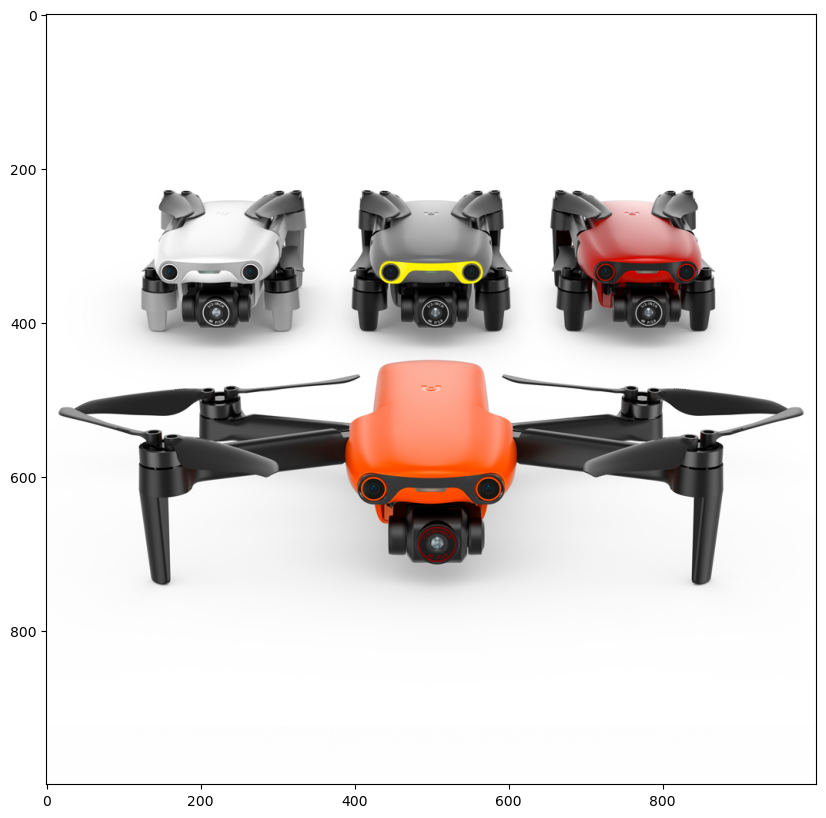

In [3]:
# Load image
img = cv2.imread('data/drns.jpg')
# Convert it to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Plot it
plt.imshow(img)

In [5]:
# Black, dark gray, light gray, white
colors = np.array([[0, 0, 0],
                   [64, 64, 64],
                   [192, 192, 192],
                   [255, 255, 255]])

In [7]:
# Cast the image to float
img = img.astype(np.float32)

# Prepare for quantization
rows, cols, channels = img.shape
quantized = np.zeros_like(img)

# Apply quantization
for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r, c]
        
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        dist = np.linalg.norm(colors - pixel, axis = 1)
        closest_colour = np.argmin(dist)
        new_pixel =  colors[closest_colour]
        
        # Apply quantization
        quantized[r, c, :] = new_pixel

(<Axes: >, <matplotlib.image.AxesImage at 0x21c9c741040>)

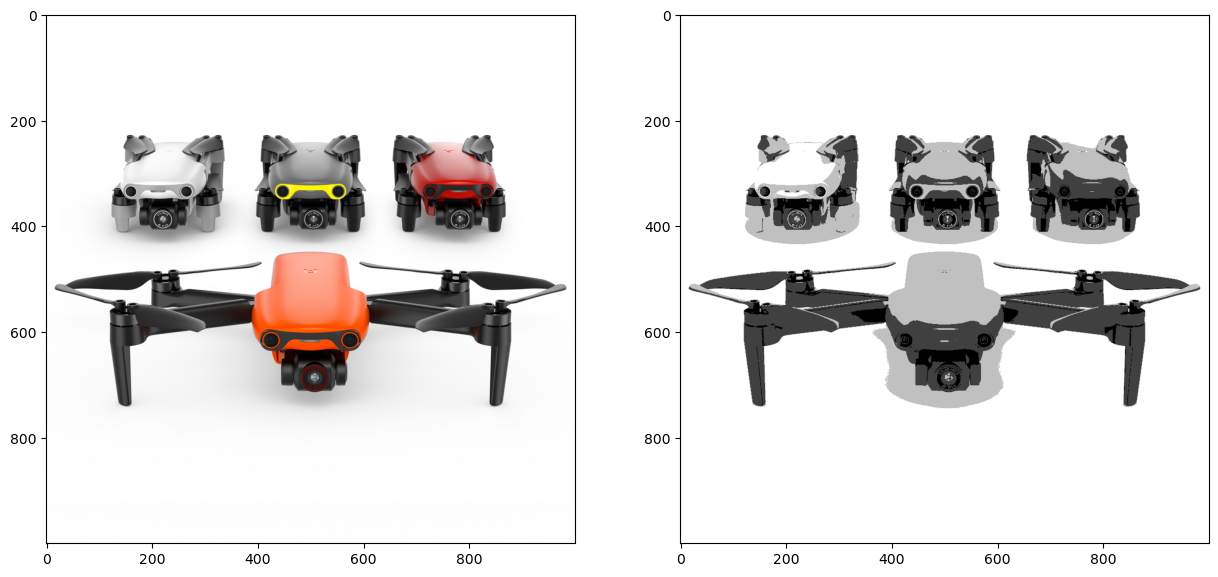

In [9]:
# Show quantized image (don't forget to cast back to uint8)
img = img.astype(np.uint8)
quantized = quantized.astype(np.uint8)
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(quantized)

In [15]:
# Compute average quantization error
quant_err = img.astype(np.float32) - quantized.astype(np.float32)
mse = np.mean(quant_err**2)
psnr = 10 * np.log10((255**2)/mse)
print('PSNR', psnr, 'dB')

PSNR 21.907869816152512 dB


In [23]:
# Make a temporal copy of the original image, we will need it for error diffusion
img_tmp = np.copy(img)
img_tmp = img_tmp.astype(np.float32)
dithering = np.zeros_like(img)
rows, cols, channels = img_tmp.shape

colors = np.array([[0, 0, 0],
                   [64, 64, 64],
                   [192, 192, 192],
                   [255, 255, 255]])

for r in range(1, rows-1):
    for c in range(1, cols-1):
        # Extract the original pixel value
        pixel = img_tmp[r, c]
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        dist = np.linalg.norm(colors - pixel, axis = 1)
        closest_colour = np.argmin(dist)
        new_pixel =  colors[closest_colour]        
        
        # Compute quantization error
        quant_error = pixel - new_pixel
        
        # Diffuse the quantization error accroding to the FS diffusion matrix
        # Note: You may need more than one line of code here
        img_tmp[r, c + 1] += quant_error * 7 / 16 
        img_tmp[r + 1, c - 1] += quant_error * 3 / 16
        img_tmp[r + 1, c] += quant_error * 5 / 16
        img_tmp[r + 1, c - 1] += quant_error * 1 / 16
        
        # Apply dithering
        dithering[r, c, :] = new_pixel

(<Axes: >, <matplotlib.image.AxesImage at 0x21c9cb60b00>)

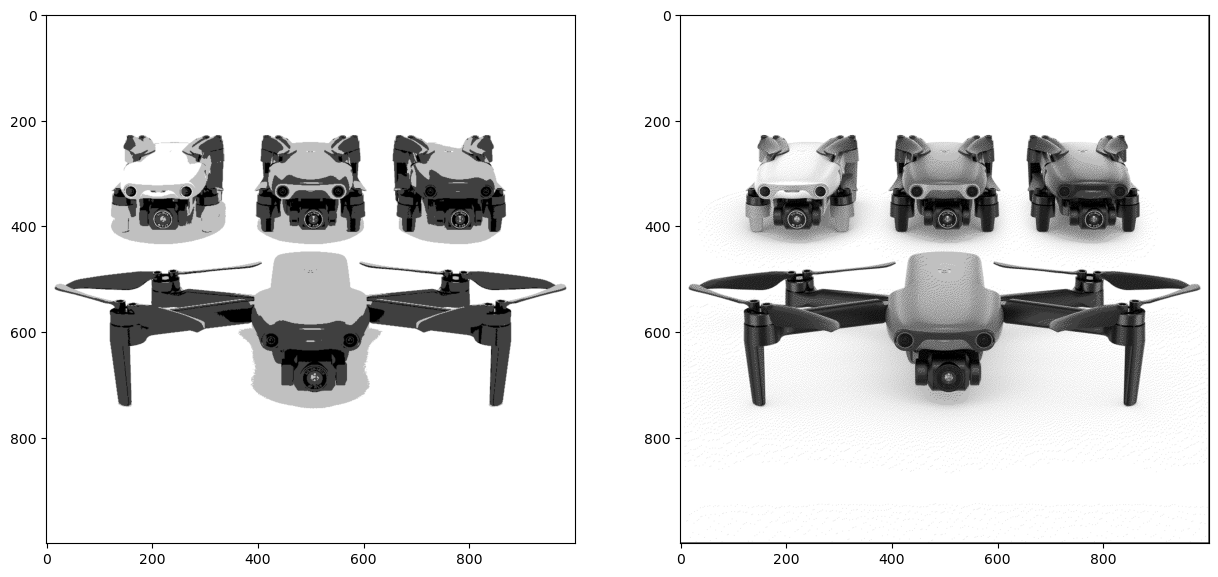

In [25]:
# Show quantized image (don't forget to cast back to uint8)
dithering = dithering.astype(np.uint8)
plt.subplot(121), plt.imshow(quantized)   # optimally quantized
plt.subplot(122), plt.imshow(dithering)   # dithering

In [27]:
# Compute average quantization error for dithered image
avg_dith_error = img.astype(np.float32) - dithering.astype(np.float32)
mse = np.mean(avg_dith_error**2)
psnr = 10 * np.log10((255**2)/mse)
print('PSNR', psnr, 'dB')

PSNR 18.523720993516626 dB


PSNR1 -32.77107521905429 dB
PSNR2 -40.460562448973775 dB


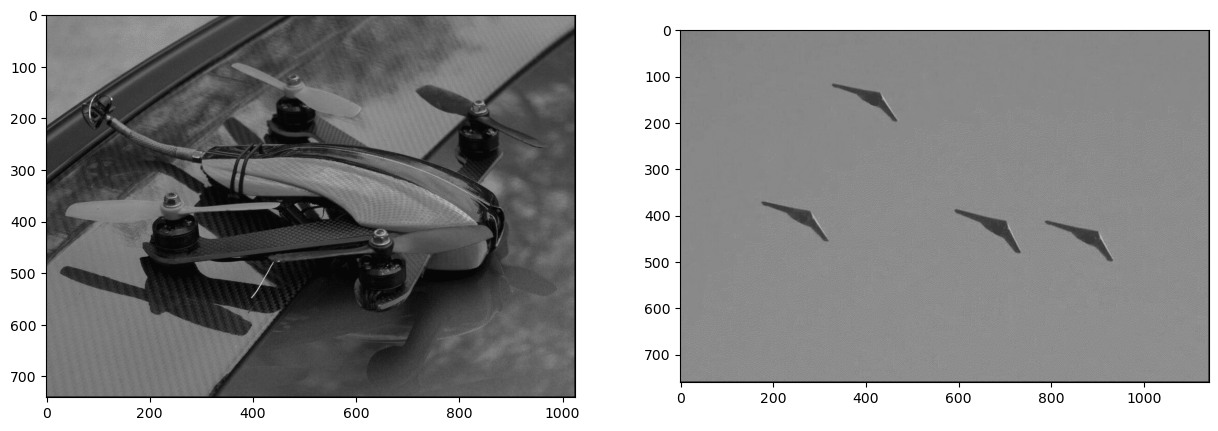

In [45]:
#                                                                 BONUS POINT
# -----------------------------------------------------------------------------------------------------------------------------------
from sklearn.cluster import KMeans
# Load image
img1 = cv2.imread('data/col_dr.jpg')
img2 = cv2.imread('data/driny.jpg')

kmeans1 = KMeans(n_clusters=16).fit(np.reshape(img1, (-1, 1)))
colors1 = kmeans1.cluster_centers_
kmeans2 = KMeans(n_clusters=16).fit(np.reshape(img2, (-1, 1)))
colors2 = kmeans2.cluster_centers_



# Convert it to RGB
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

img1 = img1.astype(np.float32)
img2 = img2.astype(np.float32)

dith1 = np.zeros_like(img1)
dith2 = np.zeros_like(img2)

rows1, cols1, channels1 = img1.shape
rows2, cols2, channels2 = img2.shape

for r1 in range(1, rows1-1):
    for c1 in range(1, cols1-1):
        # Extract the original pixel value
        pixel1 = img1[r1, c1]
         # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        dist1 = np.linalg.norm(colors1 - pixel1, axis = 1)
        closest_colour1 = np.argmin(dist1)
        new_pixel1 =  colors1[closest_colour1]        
        
        # Compute quantization error
        quant_error1 = pixel1 - new_pixel1
# Diffuse the quantization error accroding to the FS diffusion matrix
        # Note: You may need more than one line of code here
        img1[r1, c1 + 1] += quant_error1 * 7 / 16 
        img1[r1 + 1, c1 - 1] += quant_error1 * 3 / 16
        img1[r1 + 1, c1] += quant_error1 * 5 / 16
        img1[r1 + 1, c1 - 1] += quant_error1 * 1 / 16
        
        # Apply dithering
        dith1[r1, c1, :] = new_pixel1

for r2 in range(1, rows2-1):
    for c2 in range(1, cols2-1):
        # Extract the original pixel value
        pixel2 = img2[r2, c2]

        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        dist2 = np.linalg.norm(colors2 - pixel2, axis = 1)
        closest_colour2 = np.argmin(dist2)
        new_pixel2 =  colors2[closest_colour2]        
        
        # Compute quantization error
        quant_error2 = pixel2 - new_pixel2
        # Diffuse the quantization error accroding to the FS diffusion matrix
        # Note: You may need more than one line of code here
        img2[r2, c2 + 1] += quant_error2 * 7 / 16 
        img2[r2 + 1, c2 - 1] += quant_error2 * 3 / 16
        img2[r2 + 1, c2] += quant_error2 * 5 / 16
        img2[r2 + 1, c2 - 1] += quant_error2 * 1 / 16
        
        # Apply dithering
        dith2[r2, c2, :] = new_pixel2
# Show quantized image (don't forget to cast back to uint8)
dith1 = dith1.astype(np.uint8)
dith2 = dith2.astype(np.uint8)
plt.subplot(121), plt.imshow(dith1)  
plt.subplot(122), plt.imshow(dith2)

avg_dith_error1 = img1.astype(np.float32) - dith1.astype(np.float32)
mse1 = np.mean(avg_dith_error1**2)
psnr1 = 10 * np.log10((255**2)/mse1)
print('PSNR1', psnr1, 'dB')
avg_dith_error2 = img2.astype(np.float32) - dith2.astype(np.float32)
mse2 = np.mean(avg_dith_error2**2)
psnr2 = 10 * np.log10((255**2)/mse2)
print('PSNR2', psnr2, 'dB')
